---
Aplicar Test de Normalidad 
---

Aplicar los tests

características del dataset iris


In [110]:
# Libraries
import sys
import pandas as pd
#import matplotlib as plt

import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
import IPython
import sklearn


**Cargar Iris Data Set**

In [111]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

**Información Data Set**

In [112]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")
print("Target names: {}".format(iris_dataset['target_names']))
print("Feature names: \n{}".format(iris_dataset['feature_names']))
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("Type of target: {}".format(type(iris_dataset['target'])))
print("Shape of target: {}".format(iris_dataset['target'].shape))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)


Visualizar las caracteríesticas en parejas: Diagrama de Dispersión

Particionar el Data set

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], train_size=0.7, test_size=0.3, random_state=0)
print("X_train shape: {}".format(X_train.shape))  
print("y_test :", y_test)

# X es una matriz, y es un vector
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (105, 4)
y_test : [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


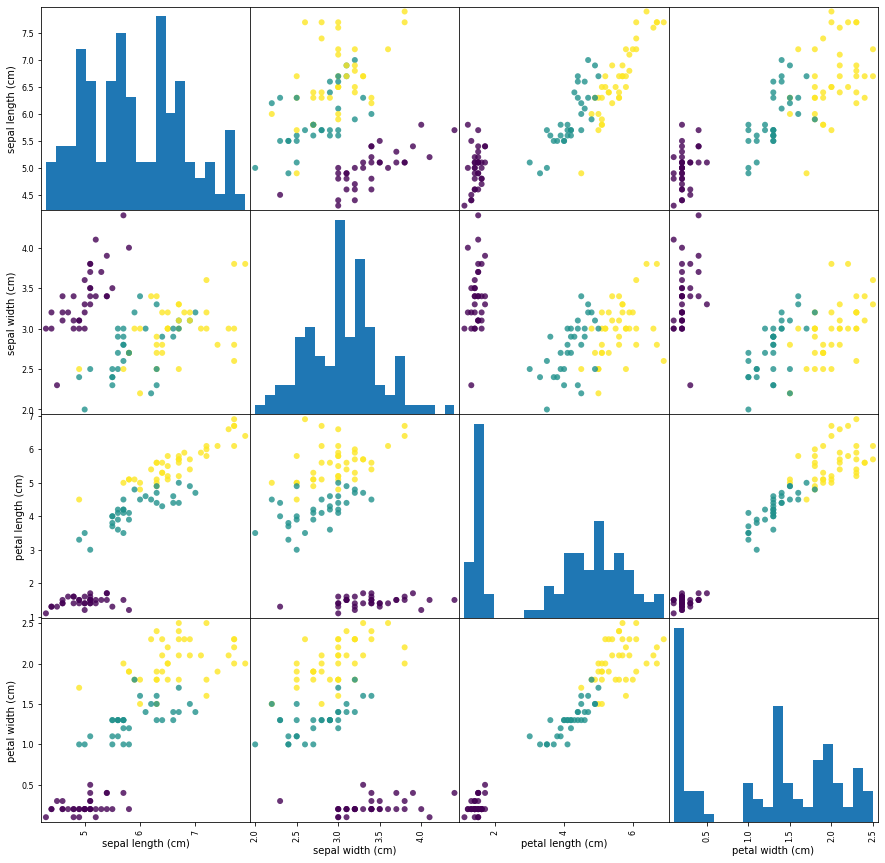

In [114]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, alpha=.8 )
# grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, diagonal='kde', figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, alpha=.8 )

---
Aplicar Tests Normalidad
---


In [115]:
#--------------------------------------------------------------
# función Shapiro-Wilk test 

def shap_wilk (X, thresh:float):

  nc=int(X.shape[1]) # obtener número de columnas=número de características
  
  resp_cond=np.zeros((nc),dtype=bool) # Respuesta sobre resultado 

  stad_kp=np.zeros([2,nc], dtype=float) # guardar valores de estadísticos 

  for i in range(nc):  #verificar indexación desde =0
    
    k,p=stats.shapiro(X[:,i])
    
    resp_cond[i]= p>thresh

    stad_kp[0,i]=k
    stad_kp[1,i]=p
  #display('Hola Condicion',resp_cond)
  #display('Hola kp', stad_kp)
  return resp_cond, stad_kp
    
#--------------------------------------------------------------------------
# function Anderson-Darling test

def ander_darl (X, thresh:float):

  nc=int(X.shape[1]) # obtener número de columnas=número de características
  
  resp_cond=np.zeros((nc),dtype=bool) # Respuesta sobre resultado 

  stad_kp=np.zeros([2,nc], dtype=float) # guardar valores de estadísticos 

  for i in range(nc):  #verificar indexación desde =0
    
    resp_AD=stats.anderson(X[:,i], dist='norm')
    k= resp_AD.statistic
    p= resp_AD.critical_values[4]  # Se predetermina siempre significance level= 1% 
    
    resp_cond[i]= k<p    # Comparación de valores internos
    stad_kp[0,i]=k
    stad_kp[1,i]=p
  return resp_cond, stad_kp
#----------------------------------------------------------------------------
# Kolmogorov-Smirnov test  OJO solo un vector!!!!
# (NOTA: H= y H1 cambia en función del parámetro 'alternative= 'two-sided', 'less', 'greater')

#The normal distribution under the null hypothesis must be fully specified 
#This is commonly done by first fitting the loc and scale parameters 
# of the distribution to the observed data, then performing the test.

def kolm_smir (X, thresh:float):

  nc=int(X.shape[1]) # obtener número de columnas=número de características
  
  resp_cond=np.zeros((nc),dtype=bool) # Respuesta sobre resultado 

  stad_kp=np.zeros([2,nc], dtype=float) # guardar valores de estadísticos 

  for i in range(nc):  #verificar indexación desde =0
    
    loc,scale=np.mean(X[:,i]) , np.std(X[:,i])
    cdf= stats.norm(loc, scale).cdf
    
    resp_KS=stats.kstest(X[:,i], cdf)
    #resp_KS=stats.kstest(X1[:,3], stats.norm.cdf,alternative='greater') #Otra alternativa sin hacer el ajuste a cdf
    k=resp_KS.statistic
    p=resp_KS.pvalue
    #alpha5= 0.01 # 1%
    resp_cond[i]= p>thresh   
    
    stad_kp[0,i]=k
    stad_kp[1,i]=p
  return resp_cond, stad_kp

#---------------------------------------------------------------------------
#Load the data for class 1

X1 = iris_dataset['data'][0:50]
#X2 = iris_dataset['data'][50:100]
#%X3 = iris_dataset['data'][100:150]

# --------------------------------------------------------------------------
# D'Agostino and Pearson´s test
k1, p1 = stats.normaltest(X1, axis=0)
#display('k2',k1, 'p:', p1)

alpha1=1e-3
resp_cond1= p1>alpha1 # condición normalidad  p1<alpha1
#display('DAgostino-Pearson, normal?:', resp_cond1)

# Jarque-Bera test :Note that this test only works for a large enough number of data samples (>2000)
k2,p2 = stats.jarque_bera(X1, axis=0)
#display('k',k2, 'p:', p2)
alpha2= 0.01
resp_cond2= p2>alpha2
#display('Jarque-Bera, normal?:', resp_cond2)

# Shapiro-Wilk test:  
resp_cond3, stad_kp3=shap_wilk (X1, 0.01)
#display('Shapiro-Wilk, normal?:',resp_cond3)


# Anderson-Darling test:  
resp_cond4, stad_kp4= ander_darl (X1, 0.01)
#display('Anderson-Darling, normal?:',resp_cond4)


# Kolmogorov-Smirnov test  OJO solo un vector!!!!
resp_cond5, stad_kp4=kolm_smir (X1, 0.01)
#display('Kolmogorov-Smirnov, normal?:', resp_cond5)

# Consolidar resultados

r1=np.append([resp_cond1],[ resp_cond2], axis=0)
r2=np.append(r1,[resp_cond3], axis=0)
r3= np.append(r2,[resp_cond4], axis=0)
r4= np.append(r3,[resp_cond5], axis=0)

# Visualizar Tabla de Resultados Generales 
list_test=['DAgostino_Pearson','Jarque_Bera','Shapiro_Wilk', 'Anderson_Darling','Kolmogorov_Smirnov']
resp_test=pd.DataFrame(r4, columns=['x1', 'x2','x3','x4'], index=list_test)

display('Test Class 1',resp_test)



'Test Class 1'

,x1,x2,x3,x4
DAgostino_Pearson,True,True,True,False
Jarque_Bera,True,True,True,False
Shapiro_Wilk,True,True,True,False
Anderson_Darling,True,True,True,False
Kolmogorov_Smirnov,True,True,True,False


---
Test de Normalidad : Clase 2

In [116]:
#---------------------------------------------------------------------------
#Load the data for CLASS 2

X2 = iris_dataset['data'][50:100]

# --------------------------------------------------------------------------
# D'Agostino and Pearson´s test
k1, p1 = stats.normaltest(X2, axis=0)
#display('k2',k1, 'p:', p1)

alpha1=1e-3
resp_cond1= p1>alpha1 # condición normalidad  p1<alpha1
#display('DAgostino-Pearson, normal?:', resp_cond1)

# Jarque-Bera test :Note that this test only works for a large enough number of data samples (>2000)
k2,p2 = stats.jarque_bera(X2, axis=0)
#display('k',k2, 'p:', p2)
alpha2= 0.01
resp_cond2= p2>alpha2
#display('Jarque-Bera, normal?:', resp_cond2)

# Shapiro-Wilk test:  
resp_cond3, stad_kp3=shap_wilk (X2, 0.01)
#display('Shapiro-Wilk, normal?:',resp_cond3)

# Anderson-Darling test:  
resp_cond4, stad_kp4= ander_darl (X2, 0.01)
#display('Anderson-Darling, normal?:',resp_cond4)

# Kolmogorov-Smirnov test  OJO solo un vector!!!!
resp_cond5, stad_kp4=kolm_smir (X2, 0.01)
#display('Kolmogorov-Smirnov, normal?:', resp_cond5)

# Consolidar resultados

r1=np.append([resp_cond1],[ resp_cond2], axis=0)
r2=np.append(r1,[resp_cond3], axis=0)
r3= np.append(r2,[resp_cond4], axis=0)
r4= np.append(r3,[resp_cond5], axis=0)

# Visualizar Tabla de Resultados Generales 
list_test=['DAgostino_Pearson','Jarque_Bera','Shapiro_Wilk', 'Anderson_Darling','Kolmogorov_Smirnov']
resp_test=pd.DataFrame(r4, columns=['x1', 'x2','x3','x4'], index=list_test)
display('Test Class 2',resp_test)


'Test Class 2'

,x1,x2,x3,x4
DAgostino_Pearson,True,True,True,True
Jarque_Bera,True,True,True,True
Shapiro_Wilk,True,True,True,True
Anderson_Darling,True,True,True,True
Kolmogorov_Smirnov,True,True,True,True


---
Test de Normalidad : Clase 3

In [117]:
#Load the data for CLASS 3

X3 = iris_dataset['data'][100:150]

# --------------------------------------------------------------------------
# D'Agostino and Pearson´s test
k1, p1 = stats.normaltest(X3, axis=0)
#display('k2',k1, 'p:', p1)

alpha1=1e-3
resp_cond1= p1>alpha1 # condición normalidad  p1<alpha1
#display('DAgostino-Pearson, normal?:', resp_cond1)

# Jarque-Bera test :Note that this test only works for a large enough number of data samples (>2000)
k2,p2 = stats.jarque_bera(X3, axis=0)
#display('k',k2, 'p:', p2)
alpha2= 0.01
resp_cond2= p2>alpha2
#display('Jarque-Bera, normal?:', resp_cond2)

# Shapiro-Wilk test:  
resp_cond3, stad_kp3=shap_wilk (X3, 0.01)
#display('Shapiro-Wilk, normal?:',resp_cond3)


# Anderson-Darling test:  
resp_cond4, stad_kp4= ander_darl (X3, 0.01)
#display('Anderson-Darling, normal?:',resp_cond4)

# Kolmogorov-Smirnov test  OJO solo un vector!!!!
resp_cond5, stad_kp4=kolm_smir (X3, 0.01)
#display('Kolmogorov-Smirnov, normal?:', resp_cond5)

# Consolidar resultados

r1=np.append([resp_cond1],[ resp_cond2], axis=0)
r2=np.append(r1,[resp_cond3], axis=0)
r3= np.append(r2,[resp_cond4], axis=0)
r4= np.append(r3,[resp_cond5], axis=0)

# Visualizar Tabla de Resultados Generales 
list_test=['DAgostino_Pearson','Jarque_Bera','Shapiro_Wilk', 'Anderson_Darling','Kolmogorov_Smirnov']
resp_test=pd.DataFrame(r4, columns=['x1', 'x2','x3','x4'], index=list_test)
display('Test Class 3',resp_test)

'Test Class 3'

,x1,x2,x3,x4
DAgostino_Pearson,True,True,True,True
Jarque_Bera,True,True,True,True
Shapiro_Wilk,True,True,True,True
Anderson_Darling,True,True,True,True
Kolmogorov_Smirnov,True,True,True,True


---
Trasformación - Característica x4 - Clase 1 
---


In [118]:
# Función para obtener cinco tests

def test_norm (x, alpha:float):
  # x vector unidimensional
  #  Se espera un valor de alpha= 0.01   
  
 
  #------------------------------------   ----------------------------------------
  # Test 1: DAgostino-Pearson
  k1, p1 = stats.normaltest(x)
  #display('k',k1, 'p:', p1)
  alpha1=1e-3
  resp_cond1= p1>alpha1 # condición normalidad  p1<alpha1
  #display('DAgostino-Pearson, normal?:', resp_cond1)

  #----------------------------------------------------------------------------
  # Test 2: Jarque-Bera
  k2,p2 = stats.jarque_bera(x)
  #display('k',k2, 'p:', p2)
  resp_cond2= p2>alpha
  
  #display('Jarque-Bera, normal?:', resp_cond2)

  #----------------------------------------------------------------------------
  # Test 3: Shapiro-Wilk
  k3,p3=stats.shapiro(x)
  resp_cond3= p3>alpha
  #display('Shapiro-Wilk, normal?:',resp_cond3)

  #----------------------------------------------------------------------------
  # Test 4: Anderson - Darling
  resp_AD=stats.anderson(x, dist='norm')
  k4= resp_AD.statistic
  p4= resp_AD.critical_values[4]  # Se predetermina siempre significance level= 1% 
  resp_cond4= k4<p4    # Comparación de valores internos
  #display('Anderson-Darling, normal?:',resp_cond4)
  
  #----------------------------------------------------------------------------
  # Test 5:  Kolmogorov-Smirnov
  
  loc,scale=np.mean(x) , np.std(x)
  cdf= stats.norm(loc, scale).cdf
  
  cdf= stats.norm(loc, scale).cdf  # Ajuste de los valores mean y dev standar para la comparación
  resp_KS=stats.kstest(x, cdf)
  #resp_KS=stats.kstest(x, stats.norm.cdf,alternative='greater') #Otra alternativa sin hacer el ajuste a cdf
  k5=resp_KS.statistic
  p5=resp_KS.pvalue
  #alpha5= 0.01 # corresponde al 1%
  resp_cond5= p5>alpha   
  #display('Kolmogorov-Smirnov, normal?:', resp_cond5)
  
  #----------------------------------------------------------------------------   
  #Consolidación resultados
  # Concatenar resultados test normalidad
  r=np.concatenate( [ [resp_cond1], [resp_cond2], [resp_cond3],  [resp_cond4], [resp_cond5] ]  )
  #Concatenar estadísticos
  stad_kp=np.concatenate( [ [[k1, k2, k3, k4, k5]],[ [p1, p2, p3, p4, p5]] ]  )
  
  return r, stad_kp

# -----------------------------------------------------------------------
# -----------------------------------------------------------------------

# Obtener los datos de x4 de Clase 1
#x4=X1[:,3]
x4=X1[:,2]
#x4=X1[:,1]
#x4=X1[:,0]


# Sin Transformacion 
resp0,kp0= test_norm (x4, 0.01)
#display('Sin Transformación:',resp0)

# Transformacions:  x-->log(x); 
x4_t1=np.log(x4)
resp1,kp1= test_norm (x4_t1, 0.01)
#display('Transformación 1:',resp1)

# Transformacions:   x--> x^(1/2) 
x4_t2=np.sqrt(x4)
resp2,kp2= test_norm (x4_t2, 0.01)
#display('Transformación 2:',resp2)

# Transformacions:   x-->x^(1/3)
x4_t3=np.power(x4, 1/3)
resp3, kp3= test_norm (x4_t3, 0.01)
#display('Transformación 3:',resp3)

# Transformacions:   x-->x^(1/1.2)
x4_t4=np.power(x4, 1/1.2)
resp4, kp4= test_norm (x4_t4, 0.01)
#display('Transformación 4:',resp4)

# Transformación Box-Cox x--> (x**lambda-1)/lambda
x4_t5, _=stats.boxcox(x4)  #optimiza el valor de lambda
resp5, kp5= test_norm (x4_t5, 0.01)
#display('Transformación 5:', resp5)

# Transformación Yeo-Johnson 
x4_t6, _=stats.yeojohnson(x4)  #optimiza el valor de lambda
resp6, kp6= test_norm (x4_t6, 0.01)
#display('Transformación 6:', resp6)

#-------------------------------------------------------------------------------
# Consolidar y visualizar resultados
r=np.concatenate( [ [resp0], [resp1], [resp2], [resp3], [resp4], [resp5], [resp6] ] )
colum__test=['DAgostino_Pearson','Jarque_Bera','Shapiro_Wilk', 'Anderson_Darling','Kolmogorov_Smirnov']
index_test=['Sin transf (x)', 'x-->log(x)','x--> x^(1/2)','x-->x^(1/3)', 'x-->x^(1/1.2)', 'BoxCox', 'Yeo-Johnson']
resp_test=pd.DataFrame(r, columns=colum__test, index=index_test)
display('Normal test With and Whitout Transformation:  x4 - Class 1',resp_test)


'Normal test With and Whitout Transformation:  x4 - Class 1'

,DAgostino_Pearson,Jarque_Bera,Shapiro_Wilk,Anderson_Darling,Kolmogorov_Smirnov
Sin transf (x),True,True,True,True,True
x-->log(x),True,True,True,False,True
x--> x^(1/2),True,True,True,True,True
x-->x^(1/3),True,True,True,True,True
x-->x^(1/1.2),True,True,True,True,True
BoxCox,True,True,True,True,True
Yeo-Johnson,True,True,True,True,True


Gráfico de Ajuste de Probabilidad
--- 
Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). 

<ipython-input-119-1c82bce703cf>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2,4,1)


<Figure size 432x288 with 0 Axes>

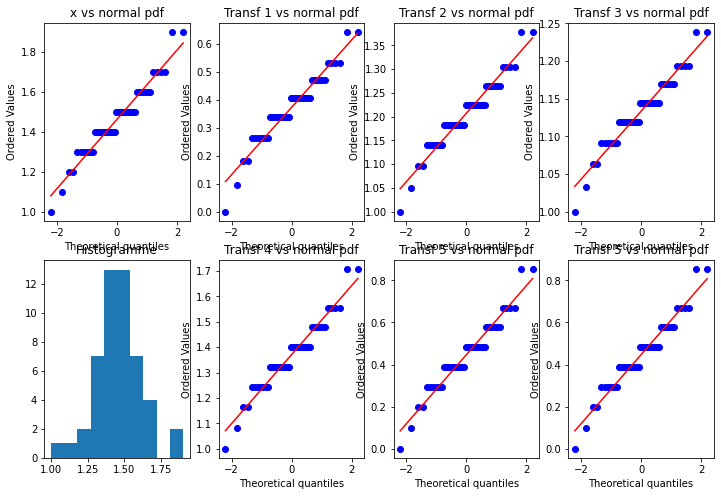

In [119]:
# característica sin transformar
#import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = plt.subplots(figsize=(12,8))
ax1 = plt.subplot(2,4,1)

x=x4
res = stats.probplot(x,dist='norm',plot=plt)
ax1.set_title('x vs normal pdf')

# Histograma 
ax1 = plt.subplot(2,4,5)
plt.hist(x)
ax1.set_title('Histogramme')


# característica con transformación 1:  
ax1 = plt.subplot(2,4,2)
x=x4_t1
res = stats.probplot(x,dist='norm',plot=plt)
ax1.set_title('Transf 1 vs normal pdf')

# característica con transformación 2:  
ax1 = plt.subplot(2,4,3)
x=x4_t2
res = stats.probplot(x,dist='norm',plot=plt)
ax1.set_title('Transf 2 vs normal pdf')

# característica con transformación 3:  
ax1 = plt.subplot(2,4,4)
x=x4_t3
res = stats.probplot(x,dist='norm',plot=plt)
ax1.set_title('Transf 3 vs normal pdf')

# característica con transformación 4:  
ax1 = plt.subplot(2,4,6)
x=x4_t4
res = stats.probplot(x,dist='norm',plot=plt)
ax1.set_title('Transf 4 vs normal pdf')

# característica con transformación 5:  
ax1 = plt.subplot(2,4,7)
x=x4_t5
res = stats.probplot(x,dist='norm',plot=plt)
ax1.set_title('Transf 5 vs normal pdf')

# característica con transformación 6:  
ax1 = plt.subplot(2,4,8)
x=x4_t5
res = stats.probplot(x,dist='norm',plot=plt)
ax1.set_title('Transf 5 vs normal pdf')

plt.show()